# Наивная баесовская классификация

Наивные баесовские классификаторы - исключительно быстрые модели, которые могут работать с многомерными данными. Мало настраиваемых параметров, поэтому часто используются как эталонные модели.

## Баесовская классификация

Поиск вероятности метки при определенных заданных признаках, являющихся результатом наблюдений 

$P(L | признаков) = \frac{P(признаков | L) P(L)}{P(признаков)}$

Один из способов выбора между двумя метками l1 и Д2 - вычисление отношения апостериорнох вероятностей для каждой из них

$\frac{P(L_{1} | признаков)}{P(L_{2} | признаков)} = \frac{P(признаков | L_{1}) P(L_{1})}{P(признаков | L_{2}) P(L_{2})}$

Модель вычисляет $P(признаков | L_{i})$ и такая модель называется порождающей, так как определяет гипотетический случайный процесс генерации данных.

"Наивным" классификатор становится из-за того, что делается "наивное" допущение относительно порождающей модели для каждой из меток. Разные наивные классификаторы основаны на разных моделях.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Гаусов наивный классификатор (данные распределены по гаусу)

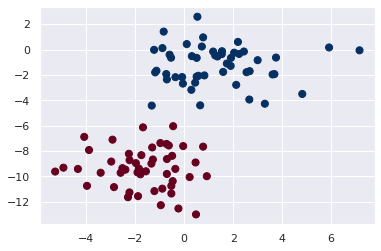

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')

для обучения достаточно найти среднее значение и стандартное отклонение точек внутри каждой категории

In [3]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y)

GaussianNB()

In [4]:
# проверим
rnd = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rnd.rand(2000, 2)
ynew = model.predict(Xnew)

(-5.890554373486014,
 7.777566725032841,
 -13.775943665162341,
 3.3634536696825847)

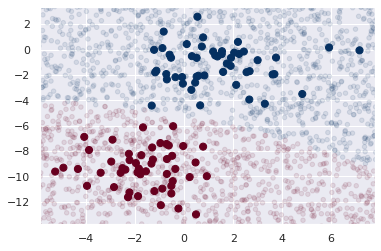

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim)

Плюс классификатора - возможность расчитать естественную вероятность классификации predict_proba

In [6]:
yprob = model.predict_proba(Xnew)
yprob.round(2)

array([[0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       ...,
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

### Полиномиальный наивный баесовский классификатор

допущение - признаки распределены  на основе простого полиномиального распределения. Полин.распределение описывает вероятность наблюдения количеств вхождений в несколько категорий, поэтому классификатор лучше всего подходит для **признаков, отражающих количество или частоту вхождения**

In [7]:
# классификаиця текстов по частоте вхождения слов
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [8]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [9]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [10]:
# векторизуем каждую строку в вектор с помощью TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [11]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

Text(89.18, 0.5, 'predicted label')

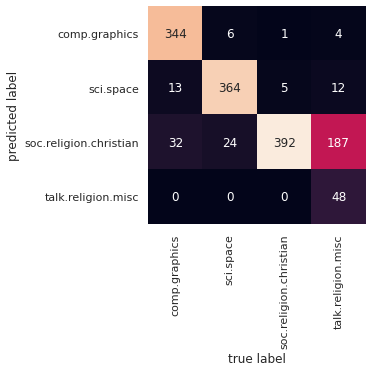

In [12]:
# матрица различий между настоящими и предсказанными метками
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [13]:
# предсказание для каждой отдельной строки
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [14]:
predict_category('sending a payload to the ISS')

'sci.space'

In [15]:
predict_category('religious people wait for ctistmas')

'soc.religion.christian'

## Когда использовать наивный баес?

- выполняют обучение и предсказание очень быстро
- обеспечивают простое вероятностное предсказание
- результаты часто легки в интерпретации
- мало или нет вообще параметров

Хорошо работают:

- когда данные действительно соответствуют наивным допущениям
- для хорошо разделяемых моделей, когда сложность неважна
- для многомерных данных (чем выше размерность, тем лучше)

## Линейная регрессия

### Простая лин.регрессия

Прямолинейная аппроксимация $y = ax + b$. a - угловой коэфициент, b - сдвиг (точка пересечения с осью Y)

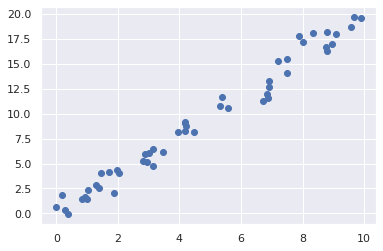

In [16]:
rnd = np.random.RandomState(1)
x = 10 * rnd.rand(50)
y = 2 * x - + rnd.randn(50)
plt.scatter(x, y)

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

In [18]:
model.fit(x[:, np.newaxis], y)

LinearRegression()

In [19]:
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

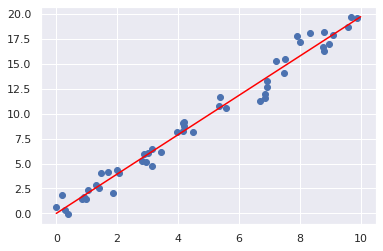

In [20]:
plt.scatter(x, y)
plt.plot(xfit, yfit, color='red')

In [21]:
# угловой клэф. и сдвиг
print('Model slope {0}, intercept {1}'.format(model.coef_[0], model.intercept_))

Model slope 1.9727911896393042, intercept -0.001422914446793655


### Многомерные линейные модели

$y - a_0 + a_1 x_1 + a_2 x_2 + ...$

геометрически это подбор плоскости (для трехмерного) или гиперплоскости (для нескольких измеренеий), разделяющих точки.

In [22]:
X = 10 * rnd.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])
model.fit(X, y)
print('Model slope {0}, intercept {1}'.format(model.coef_, model.intercept_))

Model slope [ 1.5 -2.   1. ], intercept 0.49999999999999556


### Регрессия по комбинации базисных функций

$y - a_0 + a_1 x_1 + a_2 x_2 + ...$

где $x_n = f_n (x)$

например если $f_n = x^2$, то 

$y - a_0 + a_1 x + a_2 x^2 + a_3 x^3 ...$

При этом модель остается линейной  - угловые коэф. никогда не умножаются и не делятся друг на друга. Фактически мы выполняем проекцию одномерных данных на многомерное пространство.

#### Полиномиальные базисные функции

In [23]:
from sklearn.preprocessing import PolynomialFeatures

In [24]:
# преобразуем одномерный массив в трехмерный
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [25]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                          LinearRegression())

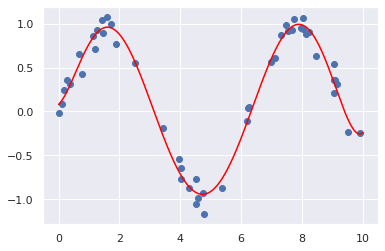

In [26]:
# аппроксимация синусоиды
x = 10 * rnd.rand(50)
y = np.sin(x) + 0.1 * rnd.randn(50)
xfit = np.linspace(0, 10, 1000)
poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit, color='red')

#### Гауссовы базисные функции

в базовый пакет не входят, напишем сами

In [27]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)

(0.0, 10.0)

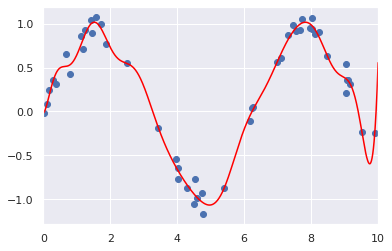

In [28]:
gaus_model = make_pipeline(GaussianFeatures(20),
                          LinearRegression())
gaus_model.fit(x[:, np.newaxis], y)
yfit = gaus_model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit, color='red')
plt.xlim(0, 10)

### Регуляризация

применение базисных функций приводит к быстрмоу переобучению. Чтобы избежать, применяется регуляризация

(-1.5, 1.5)

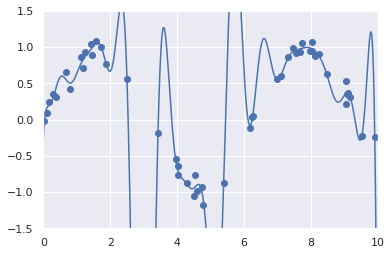

In [29]:
model = make_pipeline(GaussianFeatures(30),
                      LinearRegression())
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5)

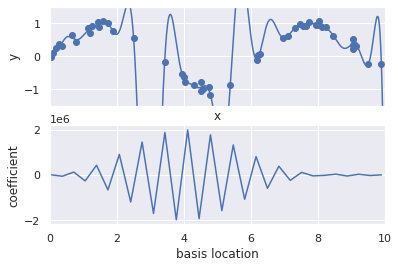

In [30]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
    
    if title:
        ax[0].set_title(title)

    ax[1].plot(model.steps[0][1].centers_,
               model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location',
              ylabel='coefficient',
              xlim=(0, 10))
    
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

#### Гребневая регрессия (L2 регуляризация)

- ridge regression
- регуляризация Тихонова

штраф накладывается на сумму квадратов (евклидовой нормы) коэффиуиентов модели

$
P = \alpha\sum_{n=1}^N \theta_n^2
$

где $\alpha$ - параметр для управления уровнем штрафа. Когда -> 0, стандартная линейная регрессия. Когда -> inf, любой отклик модели подавляется

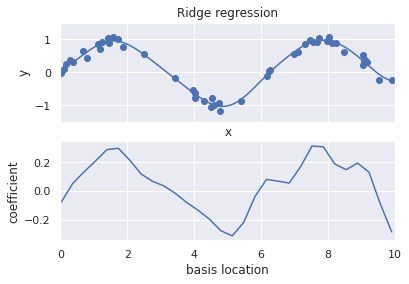

In [31]:
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30),
                     Ridge(alpha=0.1))
basis_plot(model, title='Ridge regression')

#### Ласс орегуляризация (L1 норма)

штрафуется сумма абсолютных значений коэфициентов модели

$
P = \alpha\sum_{n=1}^N |\theta_n|
$

По геометрическим причинам лассо регрессия любит разреженные модели, т.е. она по возможности делает коэффициенты равными 0

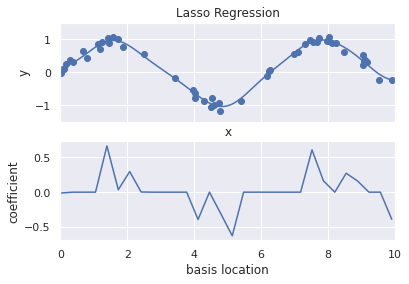

In [32]:
from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001))
basis_plot(model, title='Lasso Regression')

## Метод опорных векторов (и ядерные методы)

метод опорных веторов - относится к разделяющим методоам (discriminative). Вместо моделирования каждого из классов ищется многообразие, разделяющее классы друг от друга.

In [33]:
from scipy import stats

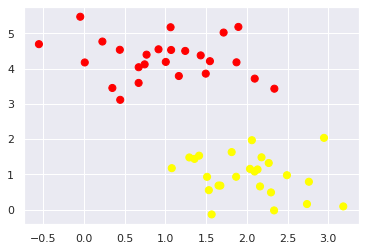

In [34]:
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

В данном случае линейный классификатор линию проведет, но нет единственной идеально разделяющей линии, т.к. нет критерия, определяющего такую линию.

(-1.0, 3.5)

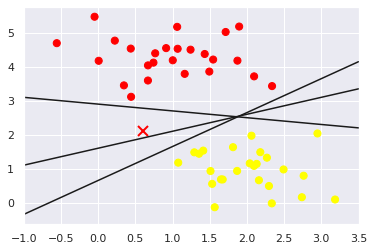

In [35]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

Метод опорных векторов максимизирует отступ (margin). Метод опорных векторов пример оценивателяс максимальным отступом - maximum margin estimator

In [36]:
from sklearn.svm import SVC #SVR - регрессия
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [37]:
# функция для 2d визуализации границ для модели
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

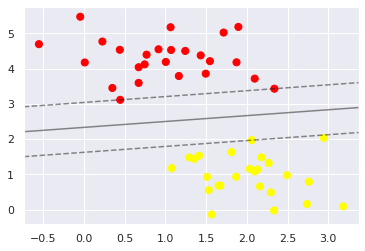

In [38]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50,cmap='autumn')
plot_svc_decision_function(model)

Разделяющая линия максимизирует отступ между двумя блобами точек. Точки (в даннмо случае), которые лежат на границе отступа называются опорными векторами (support vectors). В sklearn данные хранятся по ссылке support_vectors_ классификатора

Важная особенность ядерных методов - удаленныен точки никак не влияют на аппроксимацию. Т.е. объем данных можно сократить с тем-же результатом

In [39]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

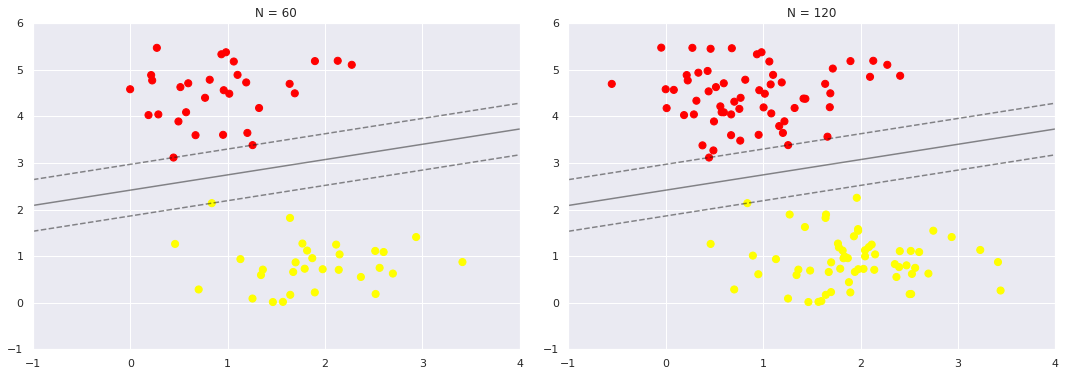

In [40]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In [41]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

<function __main__.plot_svm(N=10, ax=None)>

#### SVM-ядро

In [42]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

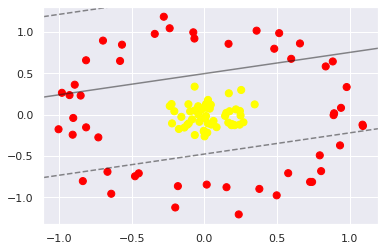

In [43]:
clf = SVC(kernel='linear').fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50,cmap='autumn')
plot_svc_decision_function(clf, plot_support=False)

Как видно, линейно ядро не справляется с таким набором данных, т.к. они линейно не разделены. Если спроецировать эти данные на пространство большей размерности, данные могу отказаться линейно разделены. В данном случае одна из подходящих простых проекций - это RBF (вычисление радиальной базисной функции)

In [44]:
r = np.exp(-(X ** 2).sum(1))

In [45]:
# визуализация (не работает)
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 90], azip=(-180, 180),
         X=fixed(X), y=fixed(y))

interactive(children=(Dropdown(description='elev', options=(-90, 90), value=-90), IntSlider(value=30, descript…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-8.51119622e-01,  2.29938408e-01],
       [-1.09904656e-01,  1.25561844e-01],
       [ 7.26836101e-01, -8.12414180e-01],
       [ 8.92019051e-01,  1.63414464e-02],
       [ 2.36093050e-01, -1.20546419e+00],
       [-1.37687583e-01, -1.56110220e-01],
       [ 3.77968934e-01, -8.97290235e-01],
       [ 2.44218208e-01,  4.41470956e-02],
       [ 6.26506648e-02, -7.65617913e-02],
       [ 3.45846982e-01,  1.23419010e-01],
       [-1.58515563e-01, -2.68726870e-02],
       [-4.08354277e-02,  6.29453228e-05],
       [-3.42171041e-02, -8.69629507e-02],
       [ 3.67825895e-02,  7.21719907e-02],
       [ 8.34408939e-01,  5.82104028e-01],
       [ 2.16643937e-01,  6.33683305e-02],
       [ 7.40744308e-01, -8.12895119e-01],
       [-6.97575732e-01,  8.94018210e-01],
       [-2.38253069e-01,  1.03795340e-01],
       [ 1.65987136e-01,  8.55080704e-01],
       [ 1.09019202e+00, -1.37371978e-01],
       [-2.11621743e-02,  5.89281121e-02],
       

Находить руками радиально-базисные функции сложно. Одна из стратегий - найти рад.базисные функции по каждой точке и отдать их в SVM. Эта стратегия называется kernel transformation (преобразование ядра) и основана на отноешнии подобия (или ядре) между каждой парой точек. Проблема этого метода - в вычислительной сложности. Для снижения сложности используется kernel trick, который помогает произвести преобразлование данных с помощью ядра неявно, не выстраивая полностю всего многомерного представления ядерной проекции.

In [46]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

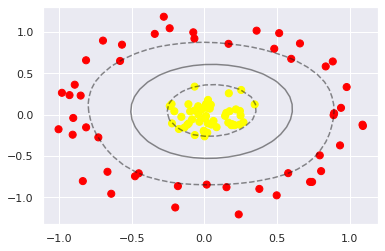

In [47]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
           s=300, lw=1, facecolors='none')

Результатом является подходящая линейная граница решений.

#### Размытие отсупов

если данные перекрываются - используется гиперпараметр C, определяющий насколько далеко точки могут заходить внутрь отступа. C - ищется перекрестной проверкой.

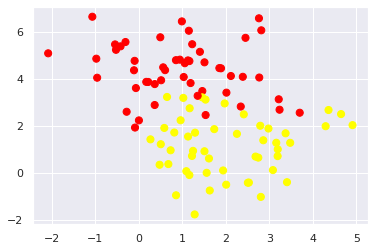

In [48]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

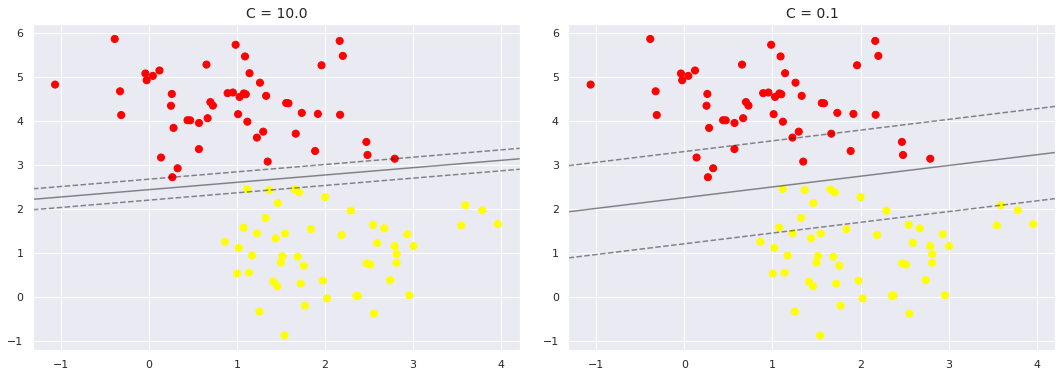

In [49]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

Достоинства

- метод опорных векторов мало зависят от всех точек данных, мало потребляют оперативки
- быстро выдаю предсказания
- т.к. задействованы только точки возле отступа, хорошо подходят для многомерных данных
- разные ядра позволяют применять метод к разнообразным данным

Недостатки

- в худшем случае $O(N^3)$ или $O(N^2)$ для некоторых реализаций
- результаты зависят от удачного выбора размытия отступа C. Перекрестная проверка может быть дорогой.
- у результатов нет вероятностной интерпретации. Ее можно получить через внутреннюю перекреснтную проверку, но это тоже дорого.

В итоге SVM подходит только когда более простые методы не работают и есть ресурс процессора.

### случайный лес

сл.лес - пример ансамбля на основе деревьев решений. Сделаем решающее дерево

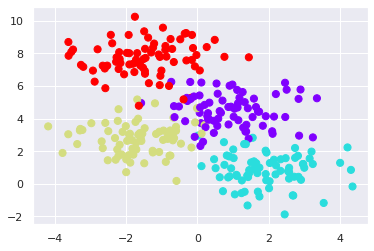

In [50]:
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')

In [51]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

In [52]:
# функция для визуализации
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

/home/konstantin/anaconda3/envs/ml-base/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: The following kwargs were not used by contour: 'clim'


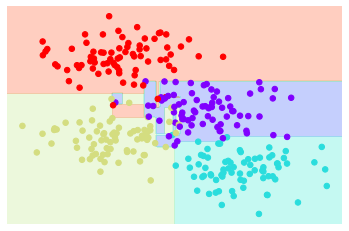

In [53]:
visualize_classifier(DecisionTreeClassifier(), X, y)

Видно, что чем глубже дерево, тем более оно переобучено. Это свойственно всем деревьям. Чтобы избежать такой ситуации и используется лес - множество деревьев, обученных на разных подмножествах данных влияют на решение совместно.

Идея комбинации нескольких переобученных оценивателей для снижения эффекта этого переобучения лежит в основе метода ансаблей под названием "беггинг". В беггинге применяется усреднение результата переобученных моделей.

/home/konstantin/anaconda3/envs/ml-base/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: The following kwargs were not used by contour: 'clim'


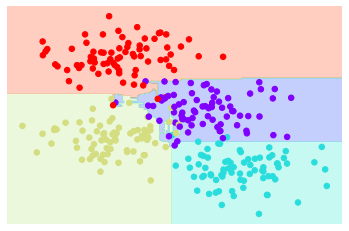

In [55]:
# беггинг вручную
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,
                        random_state=1)

bag.fit(X, y)
visualize_classifier(bag, X, y)

Обучение производилось на 80% обучающих точек. На практике обеспечивается стохастичность процесса - облучение производится на всех данных но с использованием различных стратегий выбора данных.

[подробнее](https://scikit-learn.org/stable/modules/ensemble.html)

/home/konstantin/anaconda3/envs/ml-base/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: The following kwargs were not used by contour: 'clim'


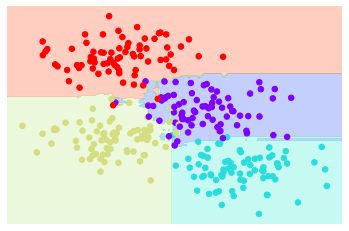

In [56]:
# беггинг из коробки с встроенной моделью рандомизации обучения
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X, y)

#### регрессия

<ErrorbarContainer object of 3 artists>

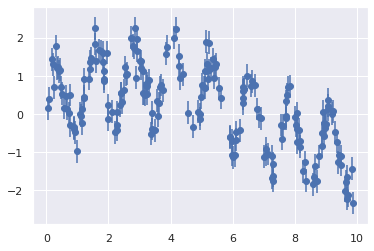

In [57]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(200)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))

    return slow_oscillation + fast_oscillation + noise

y = model(x)
plt.errorbar(x, y, 0.3, fmt='o')

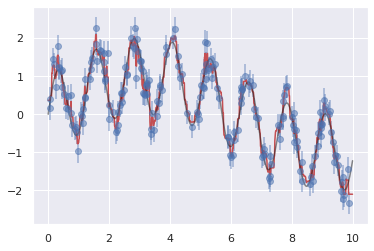

In [58]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(200)
forest.fit(x[:, None], y)

xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, None])
ytrue = model(xfit, sigma=0)

plt.errorbar(x, y, 0.3, fmt='o', alpha=0.5)
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5)